In [42]:
import pandas as pd

In [43]:
path = "C:\\Users\olive\DataScience\MarketingDirecto_2.csv"

In [44]:
mark = pd.read_csv(path, sep = ';')
mark

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755.0
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318.0
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296.0
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436.0
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,NaN
...,...,...,...,...,...,...,...,...,...,...
995,Joven,Femenino,Alquilada,Soltero,Cerca,19400,1,NaN,18,384.0
996,Media,Masculino,Alquilada,Soltero,Lejos,40500,1,NaN,18,1073.0
997,Adulta,Masculino,Propia,Soltero,Cerca,44800,0,Medio,24,1417.0
998,Media,Masculino,Propia,Casado,Cerca,79000,2,Medio,18,671.0


In [45]:
data = pd.read_csv("C:\\Users\olive\DataScience\Grid v1.csv")

C:\Users\olive\AppData\Local\Temp\ipykernel_33664\604825620.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:\\Users\olive\DataScience\Grid v1.csv")


In [46]:
data.head()

,Description,Col_Name,Row_Name,rsrp,incidentes,redireccion,best_server,cqi
0,A1,A,1,0.0,0,0.0,NaN,0.0
1,A2,A,2,0.0,0,0.0,NaN,0.0
2,A3,A,3,0.0,0,0.0,NaN,0.0
3,A4,A,4,0.0,0,0.0,NaN,0.0
4,A5,A,5,0.0,0,0.0,NaN,0.0


In [47]:
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
import sklearn
import os

In [60]:
data = data.loc[data['rsrp']<0]

In [64]:
data.head()

,Description,Col_Name,Row_Name,rsrp,incidentes,redireccion,best_server,cqi
0,AA127,AA,127,-115.7500,0,884.696988,01403753_LM_Ancon,10.856694
1,AB127,AB,127,-112.7500,0,381.359613,01403753_LM_Ancon,11.205094
2,AC127,AC,127,-118.3750,0,713.387431,01403753_LM_Ancon,8.729160
3,AD126,AD,126,-115.3750,0,307.311721,01403753_LM_Ancon,9.607077
4,AE127,AE,127,-118.1875,0,1728.576707,01403753_LM_Ancon,9.835512


In [65]:
data = data.reset_index(drop=True)

In [66]:
data.head()

,Description,Col_Name,Row_Name,rsrp,incidentes,redireccion,best_server,cqi
0,AA127,AA,127,-115.7500,0,884.696988,01403753_LM_Ancon,10.856694
1,AB127,AB,127,-112.7500,0,381.359613,01403753_LM_Ancon,11.205094
2,AC127,AC,127,-118.3750,0,713.387431,01403753_LM_Ancon,8.729160
3,AD126,AD,126,-115.3750,0,307.311721,01403753_LM_Ancon,9.607077
4,AE127,AE,127,-118.1875,0,1728.576707,01403753_LM_Ancon,9.835512


In [67]:
pd.value_counts(data['incidentes'])

0    21601
1     1502
Name: incidentes, dtype: int64

In [68]:
data['incidentes'] = data['incidentes'].replace([2,3,4,5,6,7],1)

<Axes: >

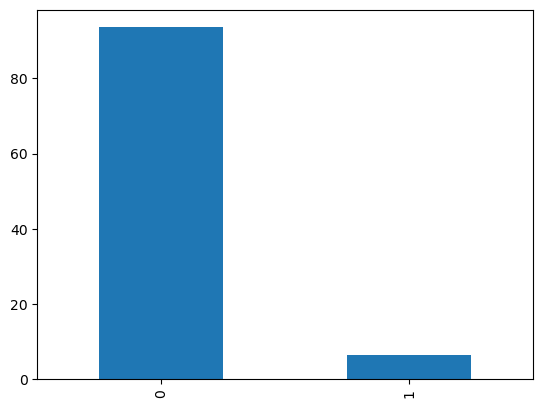

In [69]:
(pd.value_counts(data['incidentes'])/len(data)*100).plot(kind='bar')


In [70]:
from sklearn.model_selection import train_test_split

In [71]:
x = data.iloc[:,0:3].values
y = data.iloc[:,3].values

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 2023)

In [74]:
pd.value_counts(y_train)

-116.500000    442
-116.312500    369
-116.875000    362
-116.687500    349
-116.125000    345
              ... 
-91.000000       1
-109.115385      1
-109.833333      1
-106.833333      1
-99.863636       1
Length: 468, dtype: int64